In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

import pandas as pd

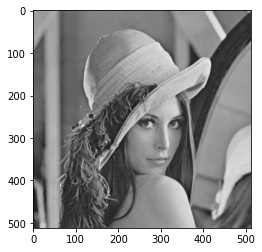

In [2]:
# Leitura da imagem
img = cv2.imread('./img/lena512.pgm',0)
plt.imshow(img, cmap = 'gray', clim=(0, 255))

In [4]:
# Escrita de imagem
with open('file', "w") as file:
    img.tofile(file)

In [3]:
# psnr
def psnr(img1, img2):
    dif = img1 - img2
    dif = dif.astype(int)
    mse = (dif**2).mean()
    return (10* np.log10((255*255)/(mse+0.0000000001)))

In [28]:
def evaluateCompression(compressionFunction, decompressionFunction):
    files = os.listdir('img')
    df = pd.DataFrame()
    for file in files:
        input_filepath = './img/' + file
        output_filepath = './tmp/' + file
        
        imageMatrix = cv2.imread(input_filepath, 0)
        if imageMatrix is None:
            continue
            
        compressionFunction(imageMatrix, output_filepath)
        decompressedImageMatrix = decompressionFunction(output_filepath)
        
        compression_rate = os.path.getsize(input_filepath) / os.path.getsize(output_filepath)
        psnr_imgs = psnr(imageMatrix, decompressedImageMatrix)
        
        df = df.append({'file': filepath, 
                        'shape': imageMatrix.shape,
                        'result_shape': imageMatrix.shape,
                        'compression_rate': compression_rate,
                        'psnr': psnr_imgs
                       }, ignore_index=True)
    

In [52]:
def convertToPgm(filepath, outpath):
    color_image = cv2.imread(filepath)

    if color_image is None:
        print(f"Couldn't read file")

    gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)
    gray_image_8bit = cv2.convertScaleAbs(gray_image)
    cv2.imwrite(outpath, gray_image_8bit)

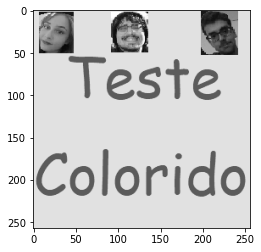

In [54]:
# Leitura da imagem
img = cv2.imread('colorida.pgm',0)
plt.imshow(img, cmap = 'gray', clim=(0, 255))



In [55]:
img

array([[225, 225, 225, ..., 225, 225, 225],
       [225, 225, 225, ..., 225, 225, 225],
       [225, 225, 225, ..., 225, 225, 225],
       ...,
       [225, 225, 225, ..., 225, 225, 225],
       [225, 225, 225, ..., 225, 225, 225],
       [225, 225, 225, ..., 225, 225, 225]], dtype=uint8)

In [53]:
convertToPgm('colorida.png', 'colorida.pgm')

In [35]:
color_image.shape

(257, 256, 3)

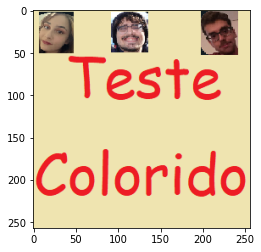

In [49]:
color_image = cv2.imread('colorida.png')
image_rgb = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

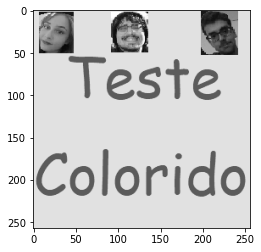

In [39]:
plt.imshow(gray_image_8bit, cmap = 'gray', clim=(0, 255))